# Prediction Observation Classification Pipeline

- **Goal:** Prediction Classification

In [1]:
import os
import sys

import importlib.util

import pandas as pd


from pathlib import Path
from IPython.display import Image

# Get the current working directory of the notebook
notebook_dir = os.getcwd()
# Add the parent directory to the system path
sys.path.append(os.path.join(notebook_dir, '../'))

import log_files
from data_processing import DataProcessing
from feature_extraction import TfidfFeatureExtraction, SpacyFeatureExtraction

# Absolute path to your local classification_models.py file
project_root = "/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions"
module_path = os.path.join(project_root, "classification_models.py")

# Dynamically load the module so it overrides any installed package
spec = importlib.util.spec_from_file_location("classification_models", module_path)
classification_models = importlib.util.module_from_spec(spec)
spec.loader.exec_module(classification_models)

# Inject into sys.modules so pickle uses this
sys.modules["classification_models"] = classification_models

# ✅ Now you can use the classes
perception_model = classification_models.SkLearnPerceptronModel()
sgd_model = classification_models.SkLearnSGDClassifier()
EvaluationMetric = classification_models.EvaluationMetric
from classification_models import SkLearnPerceptronModel, SkLearnSGDClassifier, EvaluationMetric

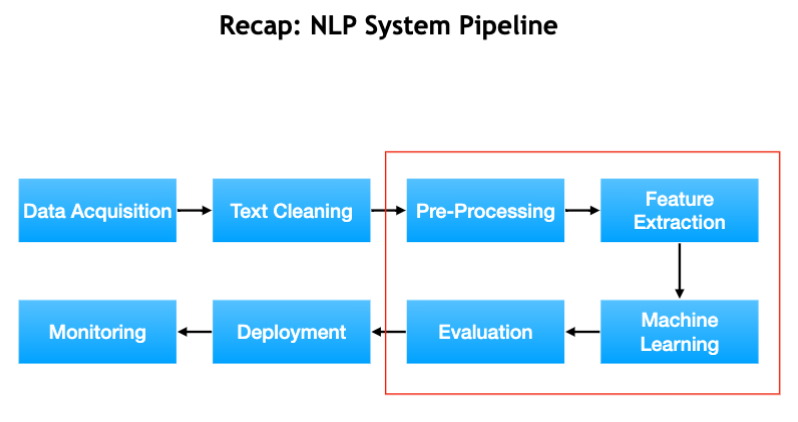

In [2]:
Image(filename='../misc/base_pipeline.png')

## 1-Data Acquisition

In [3]:
pd.set_option('max_colwidth', 800)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
log_file_path = "data/prediction_logs"
predictions = True
predictions_df = log_files.read_data(notebook_dir, log_file_path, predictions)
predictions_df.head(7)

Start logging batch
log_directory: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/pipelines/../data/prediction_logs
save_batch_directory: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/pipelines/../data/prediction_logs/batch_1-predictions
CSV to DF
Load saved csv: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/pipelines/../data/prediction_logs/batch_1-predictions/batch_1-from_df.csv
save_batch_directory: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/pipelines/../data/prediction_logs/batch_2-predictions
CSV to DF
Load saved csv: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/pipelines/../data/prediction_logs/batch_2-predictions/batch_2-from_df.csv
save_batch_directory: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/pipelines/../data/prediction_logs/batch_3

,Base Sentence,Sentence Label,Domain,Model Name,API Name,Batch ID,Template Number
0,"On August 21, 2024, as a financial analyst, I predict that the revenue at Amazon will potentially decrease in Q3 of 2027.",1,finance,gpt-3.5-turbo,NAVI_GATOR,0,1
1,"On 2024-08-21, Morgan Stanley speculates the operating income at Amazon will likely increase.",1,finance,gpt-4o,NAVI_GATOR,0,2
2,"According to JPMorgan Chase, the net profit at Microsoft is expected to decrease in Q2 of 2024.",1,finance,mixtral-8x7b-instruct,NAVI_GATOR,0,1
3,"On August 21, 2023, Goldman Sachs speculates that the stock price at Amazon will likely increase.",1,finance,mixtral-8x7b-instruct,NAVI_GATOR,0,2
4,"George, a financial analyst, predicts that on 01/15/2024, the Google revenue may rise.",1,finance,mixtral-8x7b-instruct,NAVI_GATOR,0,3
5,"According to BlackRock, the operating cash flow at ExxonMobil would fall in Q3 2023.",1,finance,mixtral-8x7b-instruct,NAVI_GATOR,0,4
6,"In Q2 2023, Wells Fargo envisions that the stock price at Tesla has some probability to remain stable.",1,finance,mixtral-8x7b-instruct,NAVI_GATOR,0,5


In [5]:
log_file_path = "data/observation_logs"
predictions = False
observations_df = log_files.read_data(notebook_dir, log_file_path, predictions)
observations_df.head(7)

Start logging batch
log_directory: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/pipelines/../data/observation_logs
save_batch_directory: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/pipelines/../data/observation_logs/batch_1-observations
CSV to DF
Load saved csv: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/pipelines/../data/observation_logs/batch_1-observations/batch_1-from_df.csv
save_batch_directory: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/pipelines/../data/observation_logs/batch_2-observations
CSV to DF
Load saved csv: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/pipelines/../data/observation_logs/batch_2-observations/batch_2-from_df.csv
save_batch_directory: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/pipelines/../data/observation_lo

,Base Sentence,Sentence Label,Domain,Model Name,API Name,Batch ID,Template Number
0,"The financial reporter, Sarah, witnessed the stock price at Tesla plummeted in Q2 of 2023.",0,finance,gpt-3.5-turbo,NAVI_GATOR,0,1
1,"From May 15, 2025, the financial analyst speculated the net profit at Amazon was drastically different.",0,finance,gpt-3.5-turbo,NAVI_GATOR,0,2
2,"On July 1, 2024, the financial expert heard that the revenue at Google remained stable.",0,finance,gpt-3.5-turbo,NAVI_GATOR,0,5
3,"Apple's operating income generally rose in August 21, 2027, according to the financial top executive.",0,finance,gpt-3.5-turbo,NAVI_GATOR,0,6
4,Goldman Sachs saw the net profit at Tesla plummeted in 2023-11-15.,0,finance,gpt-4o,NAVI_GATOR,0,1
5,"From 2025-03-30, Morgan Stanley speculated the gross profit at Apple was drastically different.",0,finance,gpt-4o,NAVI_GATOR,0,2
6,"2026/12/01, a financial analyst heard that the operating income at Amazon remained stable.",0,finance,gpt-4o,NAVI_GATOR,0,5


## 2-Data Processing

In [6]:
pred_obs_dfs = [predictions_df, observations_df]
base_df = DataProcessing.concat_dfs(pred_obs_dfs)
shuffled_base_df = DataProcessing.shuffle_df(base_df)
shuffled_base_df.head(7)

,Base Sentence,Sentence Label,Domain,Model Name,API Name,Batch ID,Template Number
0,"In Q3 of 2027, a health expert, Dr. Robert Johnson, foresees that the overall mental health well-being in the US has some probability to remain stable, given the increasing awareness and support.",1,health,mixtral-8x7b-instruct,NAVI_GATOR,0,5
1,"From Q2 2020, Policy Insights speculated the unemployment rates in Detroit were drastically different.",0,policy,gpt-4o,NAVI_GATOR,0,2
2,"In Q2 of 2024, Healthcare Analytics Inc. predicted a considerable increase in the prevalence of mental health issues in urban areas compared to rural areas.",0,health,mixtral-8x7b-instruct,NAVI_GATOR,0,2
3,The weather reporter noticed the temperature in Miami plummeted in the last 24 hours.,0,weather,gpt-3.5-turbo,NAVI_GATOR,0,1
4,"On August 21, 2024, as a financial analyst, I predict that the revenue at Amazon will potentially decrease in Q3 of 2027.",1,finance,gpt-3.5-turbo,NAVI_GATOR,0,1
5,"On 08/21/2024, policy analyst John Kim speculates that the number of cybersecurity breaches in the finance sector will likely decrease.",1,policy,mixtral-8x7b-instruct,NAVI_GATOR,0,2
6,"Cleveland Clinic's nutritional intake generally rose in Q2 of 2025, according to Health Researcher Mike.",0,health,gpt-4o,NAVI_GATOR,0,6


## 3-Feature Extraction

### TF x IDF

In [7]:
max_features = None

tf_idf_feature_extractor = TfidfFeatureExtraction(shuffled_base_df, 'Base Sentence')
tfidf_vectorized_features = tf_idf_feature_extractor.word_feature_extraction(max_features)
tfidf_vectorized_features_df = tf_idf_feature_extractor.feature_scores(max_features)
tfidf_vectorized_features_df.head(7)

,Base Sentence,Sentence Label,01,03,04,05,06,07,08,09,10,11,12,15,19,2015,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,21,22,24,30,accessibility,according,accumulated,accuweather,acquisitions,activists,activity,adams,adopt,adults,advisor,advocates,african,aged,agreements,alex,alice,allergies,allergy,alphabet,amazon,america,american,among,analysis,analyst,analytics,and,angeles,apple,areas,as,association,asthma,at,august,average,awareness,based,be,being,below,between,blackrock,boston,breaches,buffett,bureau,by,ca,cafeteria,california,cardiovascular,carter,cash,cdc,center,centers,central,change,changes,channel,chase,chen,chicago,children,china,choices,cholesterol,chronic,city,claire,clara,clean,cleveland,climate,clinic,clinics,club,cnbc,coastal,college,community,company,compared,compliance,concerning,confidence,considerable,considerably,consistent,consumer,corporations,costs,council,countries,cramer,current,customer,cybersecurity,dallas,date,dave,david,day,december,declined,decrease,defense,department,desert,detection,detroit,developing,development,diabetes,dietary,diets,different,diseases,doe,downtown,dr,drastically,drop,due,early,earnings,economic,economist,education,efforts,elderly,electric,emerging,emily,emphasizing,energy,engagement,environment,environmental,environmentalist,envision,envisions,even,executive,expected,expenditure,expenses,expert,experts,exxonmobil,facilities,fall,fargo,finance,financial,first,fitness,flow,fluctuations,for,forecasts,foresees,fostering,francisco,from,funding,gdp,general,generally,george,given,global,goldman,google,government,greentech,gross,group,growth,gupta,gym,habits,had,half,has,have,health,healthcare,healthier,heard,heart,high,higher,hopkins,hospitals,hours,houston,humidity,illnesses,immunology,impact,impacts,improved,in,inc,income,increase,increasing,initiatives,insights,institute,institutions,intake,intervention,is,issues,it,james,jane,january,jim,john,johns,johnson,jpmorgan,july,june,kim,last,leading,lee,legislative,level,levels,lifestyle,lifestyles,likely,lisa,local,logistics,los,maria,mark,markets,marketwatch,may,mayo,me,medical,medlab,mendez,mental,mergers,meteorological,meteorologist,metrics,mi,miami,microsoft,midnight,midwest,mike,minor,month,months,more,morgan,mountain,mr,national,need,net,new,news,next,nih,north,noted,noticed,noticing,noting,november,number,nurse,nutrition,nutritional,obesity,observed,october,of,on,only,operating,or,organization,organizations,orleans,over,overall,particularly,past,patel,patients,people,period,person,phoenix,physical,plummeted,policy,population,positive,potential,potentially,poverty,precipitation,predict,predicted,predicts,prevalence,preventative,price,primary,probability,profit,projects,prominent,public,published,q1,q2,q3,q4,quarter,rachel,rainy,range,rate,rates,recent,reform,reforms,region,regulations,regulatory,relatively,released,remain,remained,renewable,report,reported,reporter,requirements,research,researcher,retail,revealed,revenue,reynolds,ridership,rise,robert,rodriguez,rose,rural,sachs,sales,sam,samantha,same,samuel,san,sanjay,sarah,satisfaction,saw,school,screenings,seasonal,seasoned,seattle,second,sector,sedentary,senior,seniors,september,service,should,significant,significantly,similar,since,six,smith,smokers,snow,sofia,sold,some,southern,speculate,speculated,speculates,speed,spending,stable,stanley,states,station,stay,stock,stores,strategist,student,study,suggested,summer,support,supportive,susan,sustainability,tank,team,techco,technology,temperature,tesla,texas,than,that,the,their,think,third,thomas,throughout,time,to,top,trade,trading,transportation,trend,trends,turnout,two,uk,unemployment,unhealthy,united,university,unseasonable,upcoming,urban,us,usage,usual,utilities,vaccination,various,vehicles,volume,voter,walmart,walton,warren,was,weather,week,well,wellness,wells,were,who,will,wind,with,within,witnessed,work,world,would,year,years,york,youth
0,"In Q3 of 2027, a health expert, Dr. Robert Johnson, foresees t

### POS and NER

In [8]:
pos_ner_feature_extractor = SpacyFeatureExtraction(shuffled_base_df, "Base Sentence")
sentences = DataProcessing.df_to_list(shuffled_base_df, 'Base Sentence')
word_leveL_disable_components = ["lemmatizer"]
all_pos_tags, word_to_pos_mapping, all_ner_entities, word_to_ner_mappings =  pos_ner_feature_extractor.extract_features(data=sentences, disable_components=word_leveL_disable_components)
pos_df = DataProcessing.convert_to_df(all_pos_tags, mapping=word_to_pos_mapping)
ner_df = DataProcessing.convert_to_df(all_ner_entities, word_to_ner_mappings)
pos_ner_features = [pos_df, ner_df]
pos_ner_features_df = DataProcessing.concat_dfs(pos_ner_features, axis=1, ignore_index=False)
pos_ner_features_df.head(7)

Spacy Doc (0):  In Q3 of 2027, a health expert, Dr. Robert Johnson, foresees that the overall mental health well-being in the US has some probability to remain stable, given the increasing awareness and support.
Spacy Doc (1):  From Q2 2020, Policy Insights speculated the unemployment rates in Detroit were drastically different.
Spacy Doc (2):  In Q2 of 2024, Healthcare Analytics Inc. predicted a considerable increase in the prevalence of mental health issues in urban areas compared to rural areas.
Spacy Doc (3):  The weather reporter noticed the temperature in Miami plummeted in the last 24 hours.


,VERB_2,AUX_1,NOUN_6,ADP_3,DET_4,ADP_5,NOUN_1,SYM_2,AUX_2,VERB_3,ADP_2,PUNCT_5,CCONJ_1,VERB_5,PROPN_5,PART_1,NUM_3,ADJ_5,NOUN_8,ADJ_2,ADJ_6,NOUN_4,PUNCT_3,DET_5,PROPN_6,SYM_1,PUNCT_6,ADJ_3,NOUN_5,NOUN_7,SCONJ_1,DET_3,NOUN_3,NUM_1,ADP_4,ADP_1,PUNCT_2,DET_1,DET_2,PRON_1,ADJ_1,ADP_6,PART_2,ADP_7,NUM_2,PROPN_1,ADP_8,VERB_1,NOUN_2,PUNCT_1,ADJ_4,PROPN_3,PROPN_2,VERB_4,ADV_1,PROPN_7,SCONJ_2,PUNCT_4,PROPN_4,GPE_1,NORP_1,FAC_1,CARDINAL_1,GPE_2,TIME_1,EVENT_1,ORG_2,DATE_1,ORG_1,LOC_1,PERSON_1,ORG_3,PERCENT_1,DATE_2
0,has,NaN,awareness,in,some,NaN,health,NaN,NaN,remain,of,",",and,increasing,US,to,NaN,NaN,NaN,mental,NaN,being,",",the,NaN,NaN,.,stable,probability,support,that,the,health,2027,NaN,In,",",a,the,NaN,overall,NaN,NaN,NaN,NaN,Q3,NaN,foresees,expert,",",NaN,Robert,Dr.,given,well,NaN,NaN,-,Johnson,Q3,NaN,NaN,NaN,US,NaN,NaN,NaN,2027,NaN,NaN,Robert Johnson,NaN,NaN,NaN
1,NaN,were,NaN,NaN,NaN,NaN,unemployment,NaN,NaN,NaN,in,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,NaN,From,.,the,NaN,NaN,different,NaN,NaN,NaN,NaN,Q2,NaN,speculated,rates,",",NaN,Insights,Policy,NaN,drastically,NaN,NaN,NaN,Detroit,Detroit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q2 2020,NaN,NaN,Policy Insights,NaN,NaN,NaN
2,compared,NaN,areas,in,NaN,in,increase,NaN,NaN,NaN,of,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mental,NaN,issues,NaN,NaN,NaN,NaN,NaN,urban,areas,NaN,NaN,NaN,health,2024,of,In,.,a,the,NaN,considerable,to,NaN,NaN,NaN,Q2,NaN,predicted,prevalence,",",rural,Analytics,Healthcare,NaN,NaN,NaN,NaN,NaN,Inc.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Healthcare Analytics Inc.,2024,Q2,NaN,NaN,NaN,NaN,NaN
3,plummeted,NaN,NaN,NaN,NaN,NaN,weather,NaN,NaN,NaN,in,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,the,temperature,24,NaN,in,NaN,The,the,NaN,last,NaN,NaN,NaN,NaN,Miami,NaN,noticed,reporter,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miami,NaN,NaN,NaN,NaN,the last 24 hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,decrease,will,NaN,at,NaN,of,analyst,NaN,NaN,NaN,as,NaN,NaN,NaN,NaN,NaN,2027,NaN,NaN,NaN,NaN,NaN,",",NaN,NaN,NaN,NaN,NaN,NaN,NaN,that,NaN,NaN,21,in,On,",",a,the,I,financial,NaN,NaN,NaN,2024,August,NaN,predict,revenue,",",NaN,Q3,Amazon,NaN,potentially,NaN,NaN,.,NaN,Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"August 21, 2024",Amazon,NaN,NaN,NaN,NaN,2027
5,decrease,will,finance,in,NaN,NaN,policy,NaN,NaN,NaN,of,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cybersecurity,NaN,NaN,NaN,NaN,NaN,NaN,breaches,sector,that,NaN,number,08/21/2024,NaN,On,.,the,the,NaN,NaN,NaN,NaN,NaN,NaN,John,NaN,speculates,analyst,",",NaN,NaN,Kim,NaN,likely,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08/21/2024,NaN,NaN,NaN,NaN,NaN,John Kim,NaN,NaN,NaN
6,according,NaN,NaN,to,NaN,NaN,intake,NaN,NaN,NaN,of,NaN,NaN,NaN,Researcher,'s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mike,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025,NaN,in,.,NaN,NaN,NaN,nutritional,NaN,NaN,NaN,NaN,Cleveland,NaN,rose,NaN,",",NaN,Q2,Clinic,NaN,generally,NaN,NaN,NaN,Health,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q2,2025,Cleveland Clinic's,NaN,Mike,NaN,NaN,NaN


In [9]:
encoded_pos_ner_df = DataProcessing.encode_tags_entities_df(pos_ner_features_df, sentence_and_label_df=shuffled_base_df)
encoded_pos_ner_df.head(3)

,Base Sentence,Sentence Label,VERB_2,AUX_1,NOUN_6,ADP_3,DET_4,ADP_5,NOUN_1,SYM_2,AUX_2,VERB_3,ADP_2,PUNCT_5,CCONJ_1,VERB_5,PROPN_5,PART_1,NUM_3,ADJ_5,NOUN_8,ADJ_2,ADJ_6,NOUN_4,PUNCT_3,DET_5,PROPN_6,SYM_1,PUNCT_6,ADJ_3,NOUN_5,NOUN_7,SCONJ_1,DET_3,NOUN_3,NUM_1,ADP_4,ADP_1,PUNCT_2,DET_1,DET_2,PRON_1,ADJ_1,ADP_6,PART_2,ADP_7,NUM_2,PROPN_1,ADP_8,VERB_1,NOUN_2,PUNCT_1,ADJ_4,PROPN_3,PROPN_2,VERB_4,ADV_1,PROPN_7,SCONJ_2,PUNCT_4,PROPN_4,GPE_1,NORP_1,FAC_1,CARDINAL_1,GPE_2,TIME_1,EVENT_1,ORG_2,DATE_1,ORG_1,LOC_1,PERSON_1,ORG_3,PERCENT_1,DATE_2
0,"In Q3 of 2027, a health expert, Dr. Robert Johnson, foresees that the overall mental health well-being in the US has some probability to remain stable, given the increasing awareness and support.",1,1,0,1,1,1,0,1,0,0,1,1,1,1,1,1,1,0,0,0,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,1,0,1,1,1,0,1,1,1,1,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1,"From Q2 2020, Policy Insights speculated the unemployment rates in Detroit were drastically different.",0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,1,0,1,1,1,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,"In Q2 of 2024, Healthcare Analytics Inc. predicted a considerable increase in the prevalence of mental health issues in urban areas compared to rural areas.",0,1,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,1,1,1,1,1,1,0,1,1,0,0,0,1,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0


In [10]:
comparison_result = (tfidf_vectorized_features_df.iloc[:, :2] == encoded_pos_ner_df.iloc[:, :2]).all().all()
comparison_result

np.True_

In [11]:
# If we don't (.iloc[:, 2:]), the sentence and label cols will be duplicated. Confirm that the first two columns are the same in both dataframes, so we can use the columns from the tfidf_vectorized_features_df dataframe.

updated_encoded_pos_ner_df = encoded_pos_ner_df.iloc[:, 2:]
sentence_label_features_df = DataProcessing.concat_dfs([tfidf_vectorized_features_df, updated_encoded_pos_ner_df], axis=1)
sentence_label_features_df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596
0,"In Q3 of 2027, a health expert, Dr. Robert Johnson, foresees that the overall mental health well-being in the US has some probability to remain stable, given the increasing awareness and support.",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.145539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.174134,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.235066,0.0,0.0,0.252887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.124643,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.119072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.252887,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.235066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.174134,0.0,0.246941,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.112190,0.000000,0.0,0.000000,0.252887,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.186779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.222422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.235066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

## Models

1. Perceptron

---

- Split: 80% train and 20% test

In [12]:
sentence_label_features_df[2]

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
5      0.000000
6      0.000000
7      0.000000
8      0.000000
9      0.000000
10     0.000000
11     0.000000
12     0.334835
13     0.000000
14     0.000000
15     0.000000
16     0.000000
17     0.000000
18     0.000000
19     0.000000
20     0.000000
21     0.000000
22     0.000000
23     0.000000
24     0.000000
25     0.000000
26     0.000000
27     0.000000
28     0.000000
29     0.000000
30     0.000000
31     0.000000
32     0.000000
33     0.000000
34     0.000000
35     0.000000
36     0.000000
37     0.000000
38     0.000000
39     0.000000
40     0.000000
41     0.000000
42     0.000000
43     0.000000
44     0.000000
45     0.000000
46     0.000000
47     0.000000
48     0.000000
49     0.000000
50     0.000000
51     0.000000
52     0.000000
53     0.000000
54     0.000000
55     0.000000
56     0.000000
57     0.000000
58     0.000000
59     0.000000
60     0.000000
61     0.000000
62     0

In [13]:
X_train, X_test, y_train, y_test = DataProcessing.split_data(sentence_label_features_df, sentence_label_features_df[2])
X_train.head(33)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596
55,"In 2020, it was heard that the environmental regulations in Los Angeles remained stable, as reported by environmentalist organizations.",0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.244658,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.250417,0.000000,0.0,0.244658,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.218353,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.271970,0.34767,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.182050,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.154239,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.305785,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0

In [14]:
def split_sentence_label_features(df: pd.DataFrame) -> tuple:
    sentences = df[0]
    prediction_labels = df[1]
    features_df = df.iloc[:, 2:]
    return sentences, prediction_labels, features_df

X_train_sentences, y_train_prediction_labels, X_train_features_df = split_sentence_label_features(X_train)

In [15]:
# y_train_prediction_labels

In [16]:
X_test_sentences, y_test_prediction_labels, X_test_features_df = split_sentence_label_features(X_test)
X_test_sentences

218                                                                                          Weather Analyst predicts that on September 15, 2025, the temperature at Chicago will potentially decrease.
66                                                                  Policy analyst Jane Smith predicts that on January 1, 2025, the number of cybersecurity breaches in the healthcare sector may rise.
9                                                                                                             The weather expert observed that the humidity in Houston generally rose in the past week.
170                                                                                     On 08/21/2024, Weather Analyst James speculates that the precipitation levels in New York will likely increase.
15                                                                    Policy analyst Dr. Samuel Lee forecasts that the legislative impacts at the healthcare sector potentially decrease in Q2 of 2026.


In [17]:
y_test_prediction_labels

218    1
66     1
9      0
170    1
15     1
200    1
25     0
196    1
154    1
126    0
215    0
19     0
96     0
178    0
175    0
137    0
146    0
30     0
226    1
185    1
108    0
162    0
205    0
181    0
125    0
18     1
147    0
101    0
104    0
84     0
198    0
60     1
118    0
45     0
16     0
127    1
159    0
119    0
82     1
144    0
93     0
194    1
143    1
73     1
113    0
112    0
150    0
Name: 1, dtype: int64

In [18]:
# perception_model = SkLearnPerceptronModel()
perception_model.train_model(X_train_features_df, y_train_prediction_labels)
perceptron_predictions = perception_model.predict(X_test_features_df)
perceptron_predictions.to_numpy().ravel()
perceptron_predictions

0     1
1     1
2     0
3     1
4     1
5     1
6     0
7     1
8     1
9     0
10    0
11    0
12    0
13    0
14    1
15    0
16    0
17    0
18    1
19    1
20    0
21    0
22    1
23    0
24    0
25    1
26    0
27    0
28    0
29    0
30    0
31    1
32    0
33    0
34    0
35    1
36    0
37    0
38    1
39    0
40    0
41    1
42    0
43    1
44    0
45    1
46    0
dtype: int64

In [19]:
# sgd_model = SkLearnSGDClassifier()
sgd_model.train_model(X_train_features_df, y_train_prediction_labels)
sgd_predictions = sgd_model.predict(X_test_features_df)
sgd_predictions.to_numpy().ravel()
sgd_predictions

0     1
1     1
2     0
3     1
4     1
5     1
6     0
7     1
8     1
9     0
10    0
11    0
12    0
13    0
14    1
15    1
16    0
17    0
18    1
19    1
20    0
21    0
22    1
23    0
24    0
25    1
26    0
27    0
28    0
29    0
30    1
31    1
32    0
33    0
34    0
35    1
36    0
37    0
38    1
39    0
40    0
41    1
42    1
43    1
44    0
45    1
46    0
dtype: int64

In [20]:
model_predictions_df = pd.concat([X_test_sentences, y_test_prediction_labels], axis=1)
model_predictions_df.columns = ['Sentence', 'Actual Label']

model_predictions_df

,Sentence,Actual Label
218,"Weather Analyst predicts that on September 15, 2025, the temperature at Chicago will potentially decrease.",1
66,"Policy analyst Jane Smith predicts that on January 1, 2025, the number of cybersecurity breaches in the healthcare sector may rise.",1
9,The weather expert observed that the humidity in Houston generally rose in the past week.,0
170,"On 08/21/2024, Weather Analyst James speculates that the precipitation levels in New York will likely increase.",1
15,Policy analyst Dr. Samuel Lee forecasts that the legislative impacts at the healthcare sector potentially decrease in Q2 of 2026.,1
200,"According to economist Dr. Sofia Mendez, the unemployment rate in the technology sector would fall in Q2 2024.",1
25,"From 2018 to 2020, the healthcare costs in New York City were drastically different, as reported by local healthcare expert, Dr. Patel.",0
196,"According to Weather Top Executive Clara, the humidity in Los Angeles would fall in June 2025.",1
154,"Policy expert Susan Lee predicts that on November 3, 2024, the number of climate change regulations in the energy sector will likely rise.",1
126,"Noticing the unseasonable weather, the meteorologist in the local news station reported the snow in New York City had accumulated more than usual on January 30, 2",0


In [21]:
model_predictions_df['Perceptron Predicted Label'] = perceptron_predictions.to_numpy().ravel()
model_predictions_df['SGD Predicted Label'] = sgd_predictions.to_numpy().ravel()
model_predictions_df

,Sentence,Actual Label,Perceptron Predicted Label,SGD Predicted Label
218,"Weather Analyst predicts that on September 15, 2025, the temperature at Chicago will potentially decrease.",1,1,1
66,"Policy analyst Jane Smith predicts that on January 1, 2025, the number of cybersecurity breaches in the healthcare sector may rise.",1,1,1
9,The weather expert observed that the humidity in Houston generally rose in the past week.,0,0,0
170,"On 08/21/2024, Weather Analyst James speculates that the precipitation levels in New York will likely increase.",1,1,1
15,Policy analyst Dr. Samuel Lee forecasts that the legislative impacts at the healthcare sector potentially decrease in Q2 of 2026.,1,1,1
200,"According to economist Dr. Sofia Mendez, the unemployment rate in the technology sector would fall in Q2 2024.",1,1,1
25,"From 2018 to 2020, the healthcare costs in New York City were drastically different, as reported by local healthcare expert, Dr. Patel.",0,0,0
196,"According to Weather Top Executive Clara, the humidity in Los Angeles would fall in June 2025.",1,1,1
154,"Policy expert Susan Lee predicts that on November 3, 2024, the number of climate change regulations in the energy sector will likely rise.",1,1,1
126,"Noticing the unseasonable weather, the meteorologist in the local news station reported the snow in New York City had accumulated more than usual on January 30, 2",0,0,0


## Evaluation

In [22]:
get_metrics = EvaluationMetric()

In [23]:
metrics = get_metrics.eval_classification_report(y_test_prediction_labels, perceptron_predictions)
metrics

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        31
           1       0.83      0.94      0.88        16

    accuracy                           0.91        47
   macro avg       0.90      0.92      0.91        47
weighted avg       0.92      0.91      0.92        47



In [24]:
metrics = get_metrics.eval_classification_report(y_test_prediction_labels, sgd_predictions)
metrics

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        31
           1       0.76      1.00      0.86        16

    accuracy                           0.89        47
   macro avg       0.88      0.92      0.89        47
weighted avg       0.92      0.89      0.90        47



In [25]:
import pickle
base_dir = os.path.join(notebook_dir, '../models')
sgd_path = os.path.join(base_dir, 'sgd_model.pkl')
with open(sgd_path, 'wb') as file:
    pickle.dump(sgd_model, file)

In [26]:
sgd_path

'/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/pipelines/../models/sgd_model.pkl'